Water quality test using classification Algorithms
-
the water Quality Test Classification algorithms" project adress the critical need for monitorinb and ensuring the safety of water sources. Water quality is vital aspectof public health and environmentalsustainability. This project employs classification algorithm to analyze water quality data and classift water samples into different quality categories, providing a rapid and relablementiond for assessingwater safety.


**Context**
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content**
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

**About this file**

Add Suggestion
ppm: parts per million
μg/L: microgram per litre
mg/L: milligram per litre

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0


The Importent relevent Librierire and modules we uses

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
import xgboost
from xgboost import XGBClassifier

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [8]:
df['Potability'].skew()

0.4507837491078628

In [9]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [10]:
len(df)

3276

In [11]:
print(len(df[df['Potability'] == 0])/len(df)*100)
print(len(df[df['Potability'] == 1])/len(df)*100)

60.98901098901099
39.010989010989015


*we all the 60 and 40 % of data is balanced therefore the data is balanced*

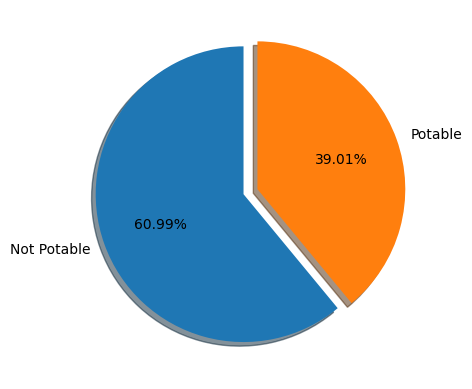

In [12]:
plt.pie(df['Potability'].value_counts(), autopct='%1.2f%%', startangle=90, shadow=True,
        labels = ['Not Potable', 'Potable'], explode=[0,0.1])

plt.show()

In [13]:
df.describe() #discribe function

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Missing Data
=

In [14]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
df.isna().mean()*100
#persentage make eassy to understand

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

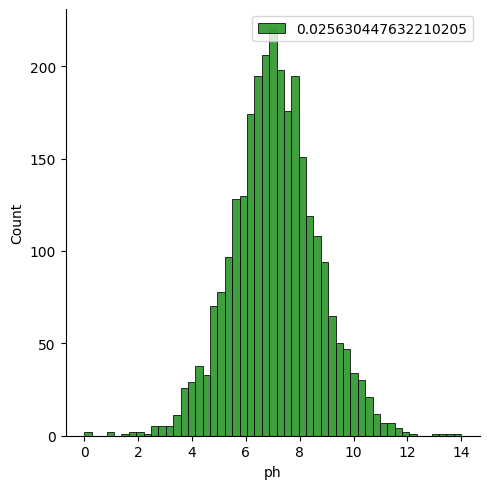

In [16]:
sns.displot(df['ph'], label = df.ph.skew(), color = 'g')
plt.legend()
plt.show

In [17]:
for i in df:
    print(i)
#hear all featuares are comeing n we want the missing value after adding if df[i].isna().sum() > 0:, we can omly get the missing value

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability


In [18]:
for i in df:
    if df[i].isna().sum() > 0:
        print(i)
#check the missing deta in all the comumn if the missing value is more than 0 then print that data

ph
Sulfate
Trihalomethanes


*These three have more than three missing value
lets make the graph of these missing data*

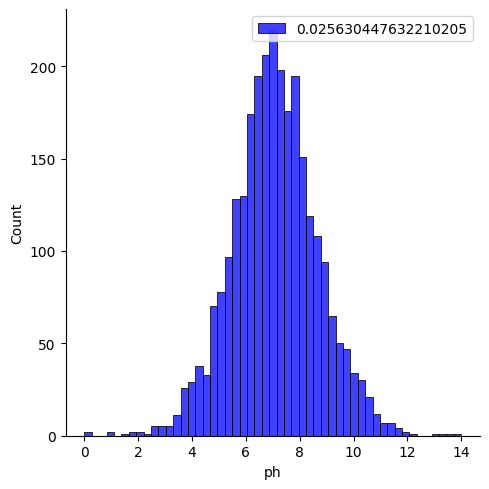

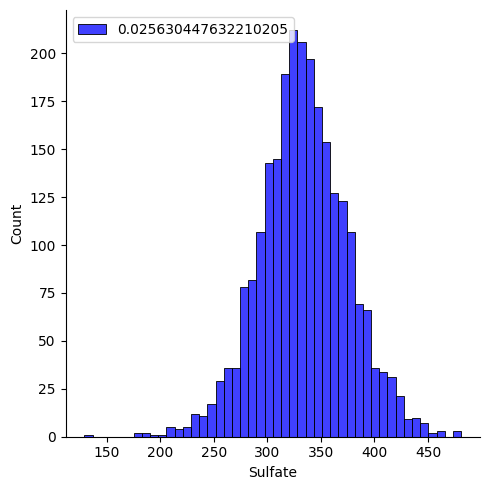

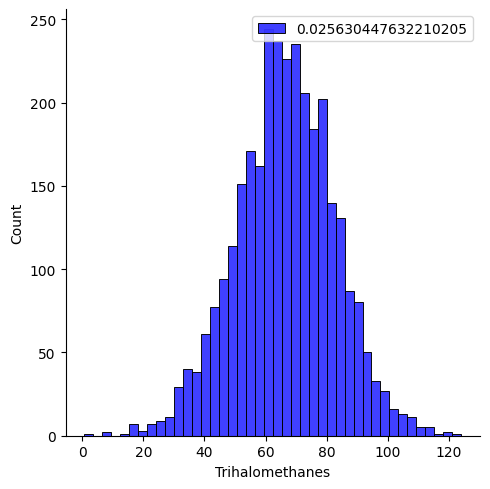

In [19]:
for i in df:
    if df[i].isna().sum() > 0:
        sns.displot(df[i], label = df.ph.skew(), color = 'b')
        plt.legend()
        plt.show()

In [20]:
for i in df:
    if df[i].isna().sum() > 0:
        print(f'{i} : {df[i].mean()}') #calculating the mena of all three

ph : 7.080794504276835
Sulfate : 333.7757766108135
Trihalomethanes : 66.39629294676803


In [21]:
for i in df:
    if df[i].isna().sum() > 0:
        print(f'{i} : {df[i].mean()}')
        df[i].fillna(df[i].mean(), inplace=True)
#(inplace means permanent)

ph : 7.080794504276835
Sulfate : 333.7757766108135
Trihalomethanes : 66.39629294676803


*the value of ph ,sulfate and trihalomethanes become zero*

In [22]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Duplicate Data
-

In [23]:
df.duplicated().sum()

0

In [24]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


Outlier Detection and treatment
-

<Axes: >

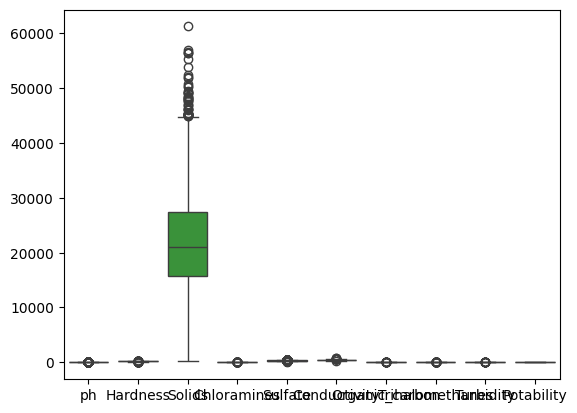

In [25]:
sns.boxplot(df)
#for individuality

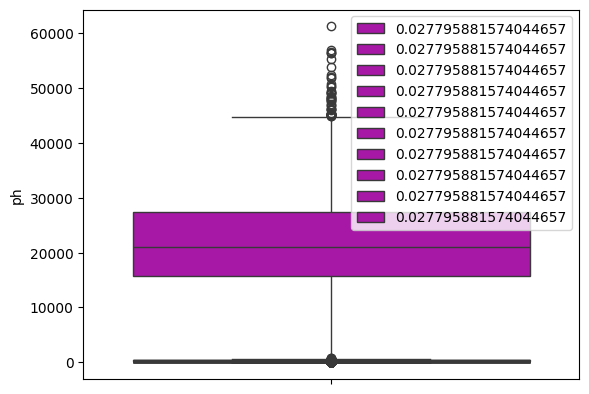

In [26]:
for i in df:
    sns.boxplot(df[i],  label = df.ph.skew(), color = 'm')
    plt.legend()
    plt.show

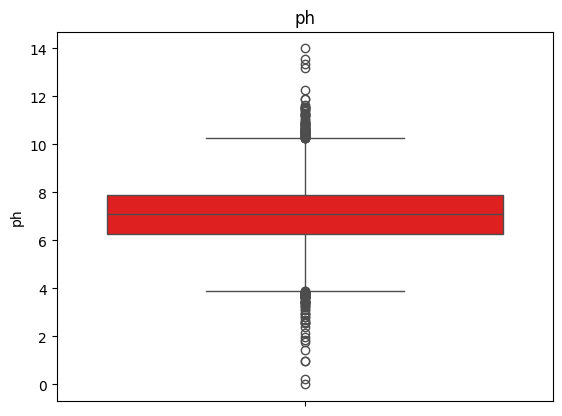

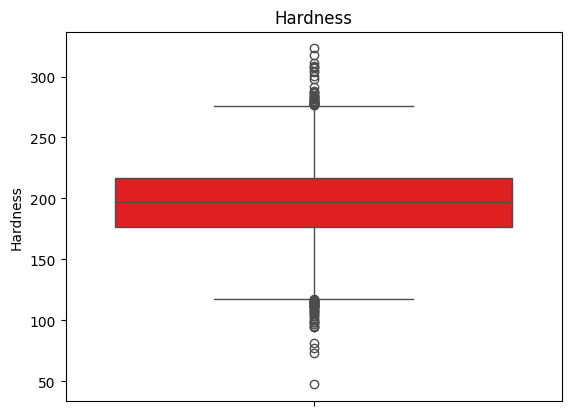

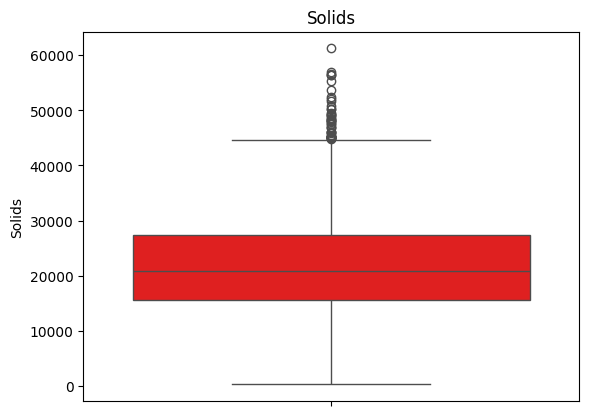

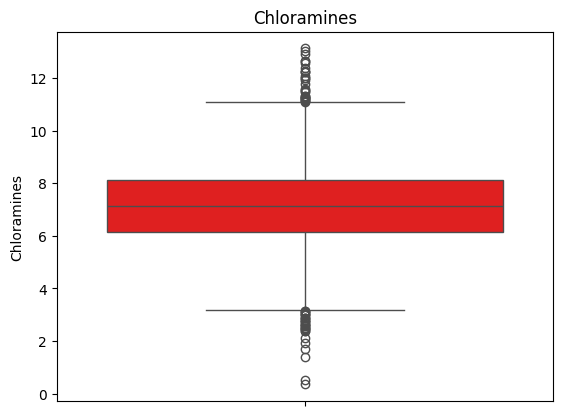

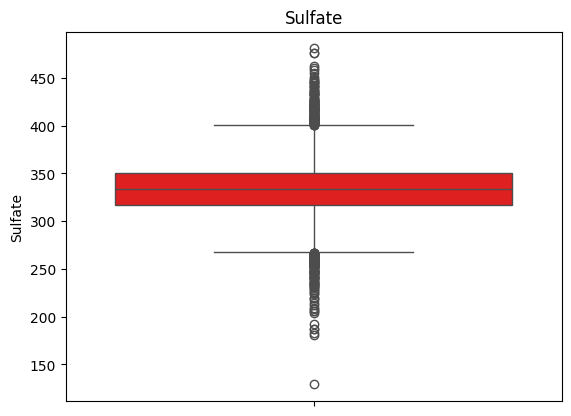

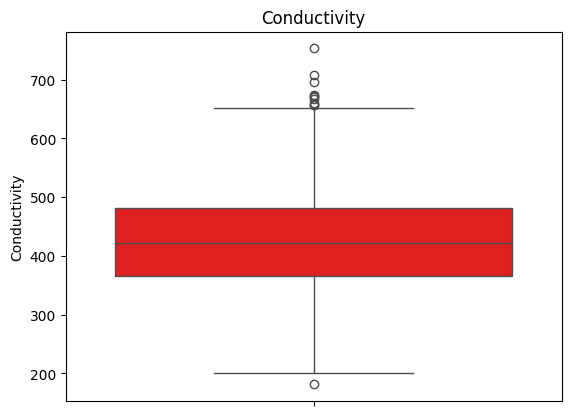

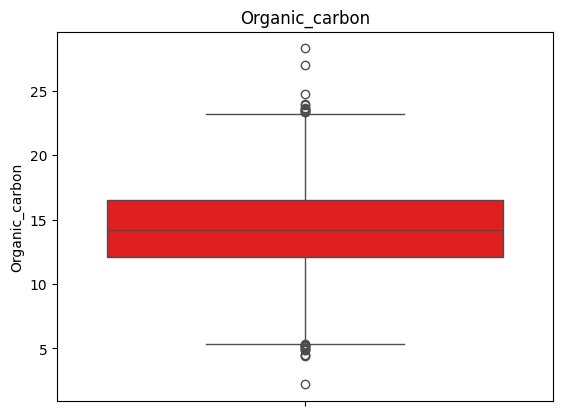

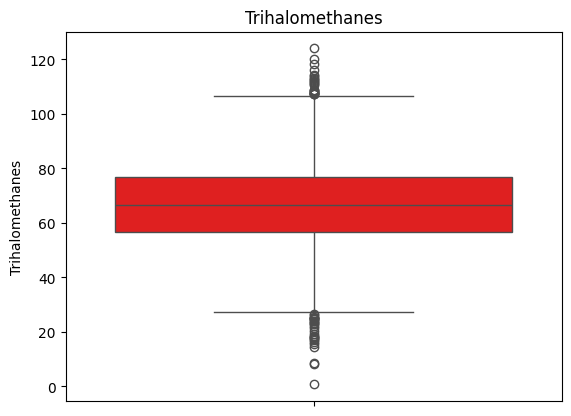

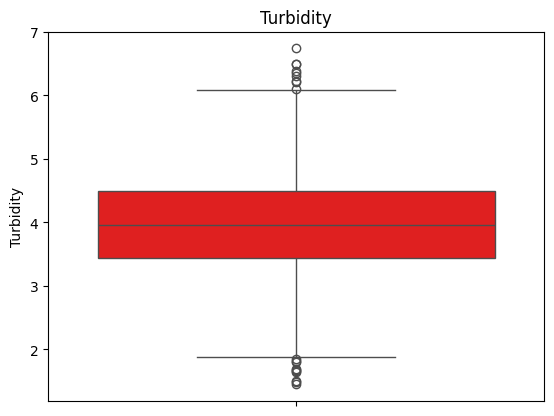

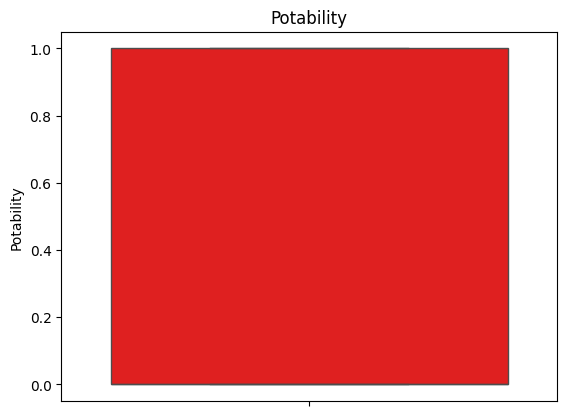

In [27]:
cols = np.random.choice(['r', 'g', 'c', 'm'])

for i in df:
    sns.boxplot(df[i], color = cols)
    plt.title(i)
    plt.show()

IQR
-

In [28]:
Q1 = df.quantile(0.25) #(25 percent of data
Q3 = df.quantile(0.75) #(75 percent of deta
IQR = Q3 - Q1
IQR

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64

In [29]:
print(Q1 - 1.5*IQR)
print()
print(Q3 + 1.5*IQR)

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64

ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


In [30]:
df.shape

(3276, 10)

In [31]:
#~=this shows we all including all the data df , 
# if the df value is smaller than lower quadirnt(IQL) OR the Df is gratter than upper quadient data
df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


Removed Outlier
-

In [32]:
#Final Data after removing the outlier

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

data = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q1 + 1.5*IQR))).any(axis=1)]
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
11,7.974522,218.693300,18767.656682,8.110385,333.775777,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,333.775777,464.525552,11.083027,38.435151,4.906358,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


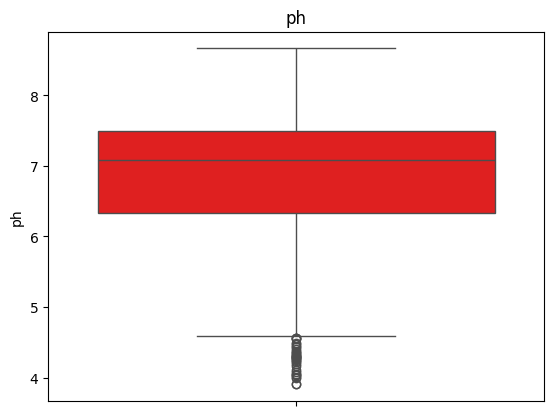

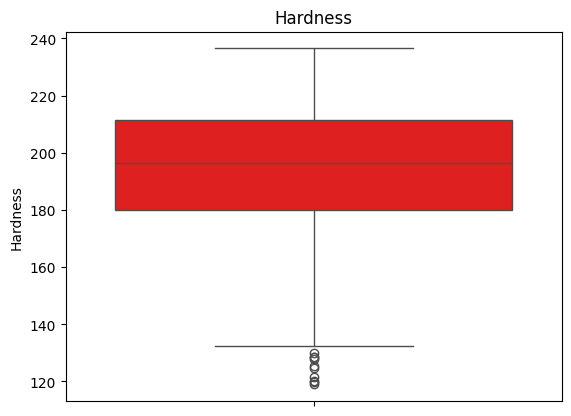

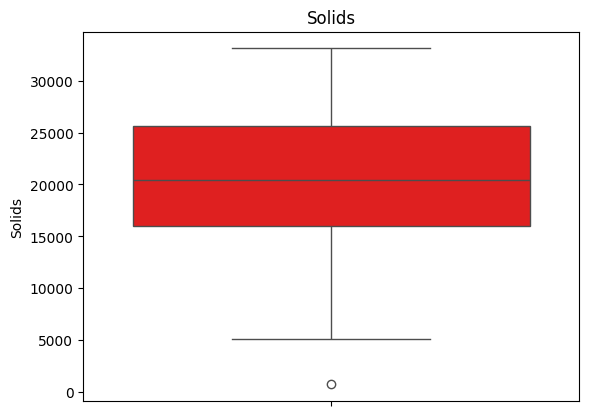

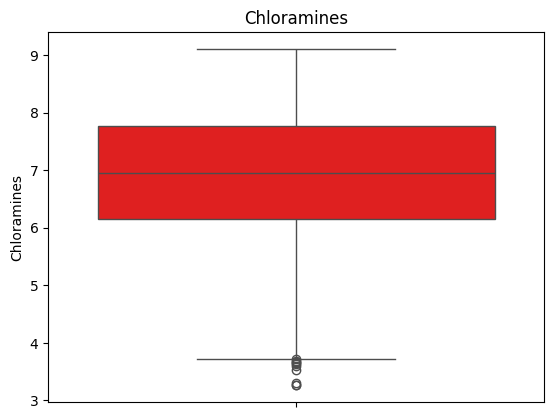

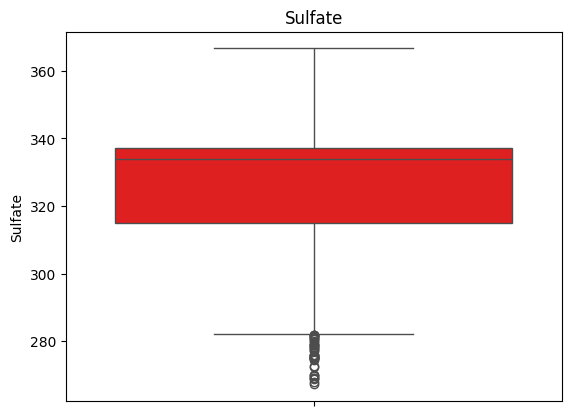

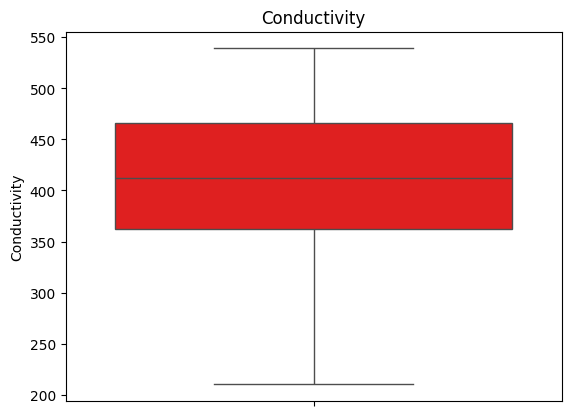

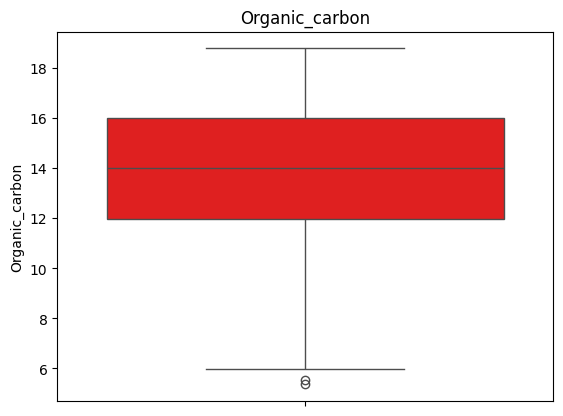

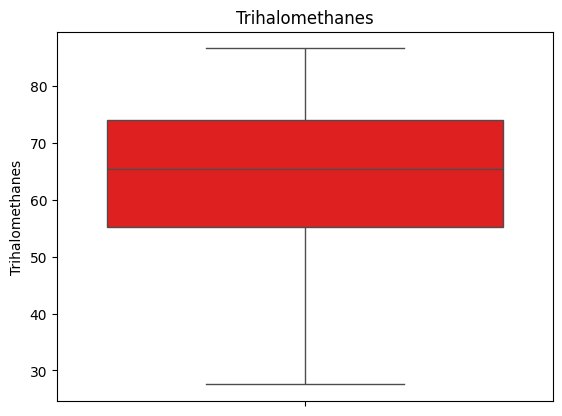

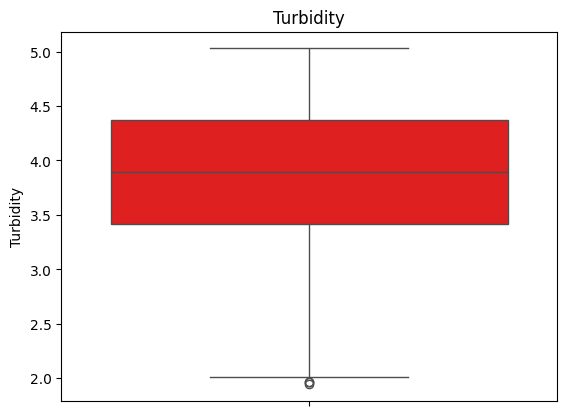

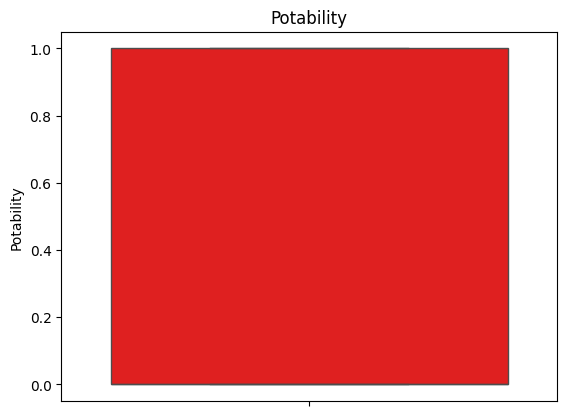

In [34]:
cols + np.random.choice(['r', 'g', 'c', 'm'])

for i in data:
    sns.boxplot(data[i], color = cols)
    plt.title(i)
    plt.show()

Feature Selection
-

In [35]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [36]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

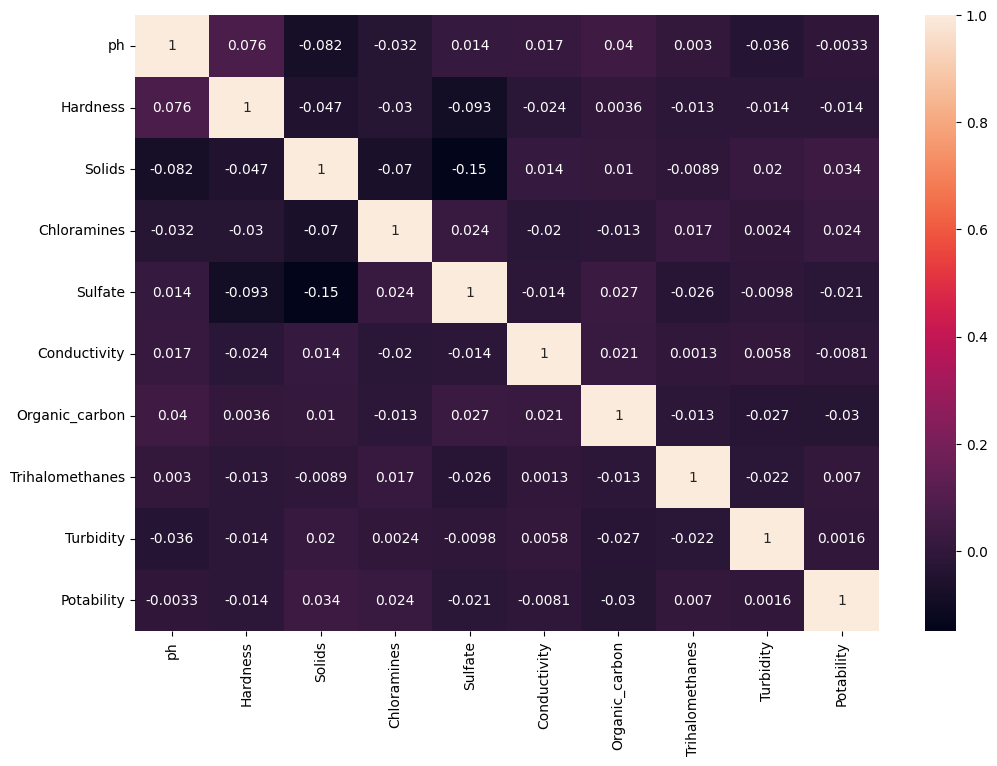

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [38]:
df.corr()['Potability']

ph                -0.003287
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.020619
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.006960
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64

Model Building
-

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


*hear we just want to seperate dependent data and independent data*

In [40]:
x = df.iloc[:, :-1]
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [41]:
y = df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [43]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
831,6.684700,193.840931,34157.184474,9.876574,344.535407,498.063996,8.818757,66.659352,4.030660
2658,6.836060,205.667718,18321.327502,6.712854,297.837188,494.484249,13.808923,70.714225,4.952508
2495,7.080795,183.488839,12675.938962,9.777807,319.870584,482.445026,13.309723,46.853410,3.240419
2603,6.406798,182.885137,17851.064021,7.462758,332.486731,398.779746,17.301617,64.070236,4.573968
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.396293,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,333.775777,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [44]:
y_train

233     0
831     0
2658    0
2495    0
2603    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2620, dtype: int64

In [45]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278
1578,6.865569,231.445054,22585.788809,5.676387,333.775777,496.603425,16.154964,91.461709,4.916218
565,7.459145,217.700130,19436.503542,4.639116,352.424439,494.094339,14.460295,57.196188,3.841052
313,5.862641,185.065220,44069.272158,4.382721,412.690111,331.570139,15.306079,59.605812,5.507421


In [46]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
208     0
1578    1
565     0
313     1
601     0
Name: Potability, Length: 656, dtype: int64

Feature scaling
-

In [47]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)



In [48]:
x_test_sc

array([[-0.00475089, -0.39688885, -0.18173596, ...,  1.80463455,
         0.0418309 ,  1.18962159],
       [-0.3040118 , -0.23133892,  1.2234509 , ...,  0.13851789,
         0.09389708,  0.77315088],
       [ 0.51854597,  0.84763722,  0.1355665 , ..., -0.25731298,
        -1.469432  , -1.88948624],
       ...,
       [ 0.2539699 ,  0.6524211 , -0.29774452, ...,  0.06346171,
        -0.57818961, -0.15256616],
       [-0.83773958, -0.34948395,  2.49085206, ...,  0.32097614,
        -0.42610701,  1.98651089],
       [-0.00475089,  0.73999074,  0.68699301, ...,  0.99878906,
         1.29328087, -0.50106067]])

In [49]:
x_train_sc

array([[-0.31737702,  0.20204646, -0.55463361, ...,  0.50622105,
        -0.08431476, -1.3411035 ],
       [-0.27560552, -0.08006604,  1.36873646, ..., -1.65420736,
         0.01907485,  0.09082874],
       [-0.17210349,  0.28302115, -0.42399002, ..., -0.13486017,
         0.27499684,  1.27418303],
       ...,
       [-0.31276111, -0.29742012,  1.00441877, ..., -0.13277954,
         1.28728622, -0.60244883],
       [ 1.15935349,  0.66263542, -0.66599679, ...,  0.6401932 ,
        -1.21534524,  0.40337428],
       [-0.26640542,  0.05640763,  1.42745437, ..., -0.63182689,
         0.00247195, -0.25894741]])

In [50]:
len(x_train_sc), len(x_test_sc)

(2620, 656)

Model Selection
-

**Using Logistic Regression**

In [51]:
#on Normal dataset
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [52]:
print(f'Training Accuracy : {lr.score(x_train, y_train)}')
print(f'Test Accuracy : {lr.score(x_test, y_test)}')

Training Accuracy : 0.6049618320610687
Test Accuracy : 0.6280487804878049


In [53]:
#On Scaled dataset

lr = LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [54]:
print(f'Traning Accuracy : {lr.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {lr.score(x_test_sc, y_test)}')

Traning Accuracy : 0.6053435114503817
Test Accuracy : 0.6280487804878049


Using Decision tree
-

In [55]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
print(f'Traning Accuracy : {dt.score(x_train, y_train)}')
print(f'Test Accuracy : {dt.score(x_test, y_test)}')

Traning Accuracy : 0.6511450381679389
Test Accuracy : 0.6341463414634146


In [57]:
#with sacled data set
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

In [58]:
print(f'Training Accuracy : {dt.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {dt.score(x_test_sc, y_test)}')

Training Accuracy : 0.6740458015267176
Test Accuracy : 0.6387195121951219


Model Traning with xgboost
-

**Using Xgboost**

In [59]:
xgb = XGBClassifier(gamma=0.5, reg_alpha=0.6, reg_lamba=0.3)
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
print(f'Traning Accuracy : {xgb.score(x_train, y_train)}')
print(f'Test Accuracy : {xgb.score(x_test, y_test)}')

Traning Accuracy : 0.916793893129771
Test Accuracy : 0.6570121951219512


In [61]:
y_pred_xgtr = xgb.predict(x_train)
y_pred_xgts = xgb.predict(x_test)

In [62]:
x_train[:3]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
831,6.684700,193.840931,34157.184474,9.876574,344.535407,498.063996,8.818757,66.659352,4.030660
2658,6.836060,205.667718,18321.327502,6.712854,297.837188,494.484249,13.808923,70.714225,4.952508


In [63]:
y_train[:3]

233     0
831     0
2658    0
Name: Potability, dtype: int64

In [64]:
y_pred_xgtr[:3]

array([0, 0, 0])

Model Ecaluation
-

In [74]:
confusion_matrix(y_train, y_pred_xgtr)

array([[1562,   24],
       [ 194,  840]], dtype=int64)

<Axes: >

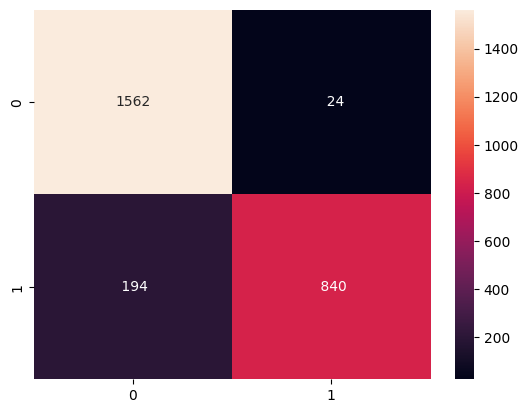

In [75]:
sns.heatmap(confusion_matrix(y_train, y_pred_xgtr), annot=True, fmt='4g')

In [76]:
accuracy_score(y_train, y_pred_xgtr)

0.916793893129771

In [77]:
print(classification_report(y_train, y_pred_xgtr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1586
           1       0.97      0.81      0.89      1034

    accuracy                           0.92      2620
   macro avg       0.93      0.90      0.91      2620
weighted avg       0.92      0.92      0.92      2620



Test
-

<Axes: >

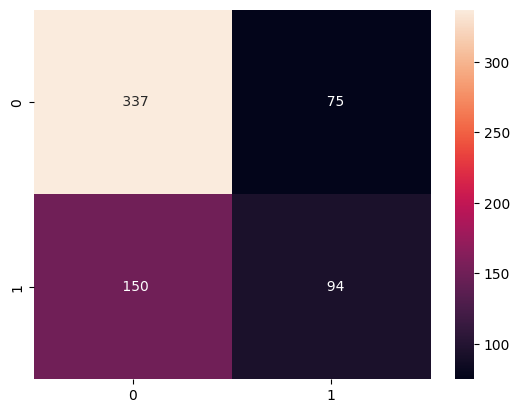

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgts), annot=True, fmt='4g')

In [79]:
accuracy_score(y_test, y_pred_xgts)

0.6570121951219512

Hyperparameter Tunning with xgboost
-

In [80]:
#Param Grid

parameters ={
    'n_estimators'  : [100, 200],
    'learning_rate' : [0.1, 0.01, 0.05],
    'max_depth'     : [3, 4, 5],
    'gamma'         : [0.2, 0.3],
    'reg_alpha'     : [0.1, 1],
    'reg_lambda'    : [0.1, 1]
}

parameters
    

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 1],
 'reg_lambda': [0.1, 1]}

Perform Grid Search
-

In [82]:
gird_search = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='accuracy', cv=5, verbose=3)
gird_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.653 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.649 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.630 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.626 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.647 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.660 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.651 t

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.5,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [84]:
print(f'Best Selected Hyperparameters: \n\{gird_search.best_params_}\n')
print(f'Best Estimator: \n\n{gird_search.best_estimator_}')

Best Selected Hyperparameters: 
\{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.1}

Best Estimator: 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [85]:
xgb = XGBClassifier(gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.2)
xgb.fit(x_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
y_pr_tr = xgb.predict(x_train_sc)
y_pr_tst = xgb.predict(x_test_sc)

<Axes: >

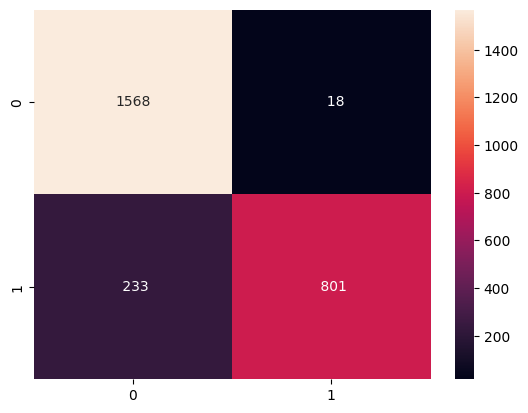

In [87]:
sns.heatmap(confusion_matrix(y_train, y_pr_tr), annot=True, fmt='4g')

In [88]:
accuracy_score(y_train, y_pr_tr)

0.9041984732824427

In [89]:
print(classification_report(y_train, y_pr_tr))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1586
           1       0.98      0.77      0.86      1034

    accuracy                           0.90      2620
   macro avg       0.92      0.88      0.90      2620
weighted avg       0.91      0.90      0.90      2620



<Axes: >

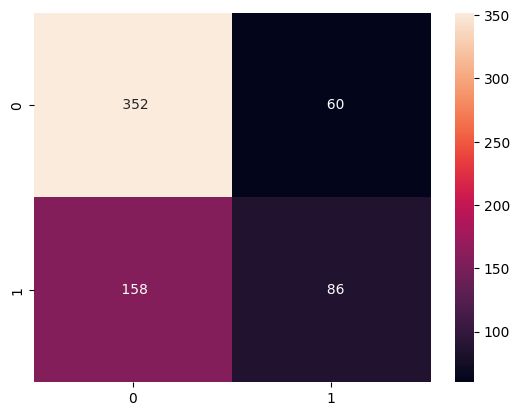

In [91]:
sns.heatmap(confusion_matrix(y_test, y_pr_tst), annot=True, fmt='4g')

In [92]:
accuracy_score(y_test, y_pr_tst)

0.6676829268292683

In [93]:
print(classification_report(y_test, y_pr_tst))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       412
           1       0.59      0.35      0.44       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656

